# **Neural Ninja Turtles**  

## **Team Members:**  
- **Nikhil Jain**  
- **Ayush Kaurav**  
- **Harsha Mishra**  
- **Param Soni**  

## **Executive Summary**  
Our project utilizes a review dataset to implement a Convolutional Neural Network (CNN) combined with classifier models to segment reviews into two categories: **"good"** and **"bad."** The **"good"** class highlights aspects that businesses excel at and should continue, while the **"bad"** class identifies areas for improvement. This segmentation provides valuable feedback, enabling businesses to enhance their operations and improve customer satisfaction.  

## **Project Background**  
Many business owners struggle to identify specific shortcomings in their operations, whether related to **service quality, product performance, or overall customer experience.** Our model addresses this gap by analyzing customer reviews and categorizing them into **"good"** and **"bad"** feedback.  

- **Bad Reviews:** Help businesses pinpoint recurring issues and areas that need improvement, allowing for **data-driven decision-making** to enhance services.  
- **Good Reviews:** Provide insights into what customers appreciate, helping businesses maintain their strengths and consistently deliver high-quality offerings.  

For customers, this model indirectly ensures a **better experience**, as businesses proactively work to resolve negative feedback. Over time, this iterative improvement process raises service standards, aligns businesses with customer expectations, and fosters **trust and satisfaction.** By addressing concerns and leveraging strengths, businesses can **enhance customer loyalty, improve retention, and drive recurring revenue.**  

## **Data Source**  
- **Yelp Dataset** – https://business.yelp.com/data/resources/open-dataset/

## **Proposed Solution**  
Our solution involves **developing a robust and adaptable machine-learning pipeline** that combines CNNs with classifiers such as **Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and Random Forest.**  

### **Implementation Steps:**  
1. **Preprocessing:** Cleaning and structuring the dataset for optimal model performance.  
2. **Feature Extraction:** Utilizing CNNs to extract meaningful textual features.  
3. **Model Training & Evaluation:** Training classifiers using key performance metrics such as **accuracy, precision, recall, and F1-score.**  
4. **Deployment & Insights:**  
   - Real-time analysis and visualization dashboards for businesses.  
   - Integration with existing analytics tools.  
   - A **feedback loop** to continuously refine the model and improve accuracy.  

By implementing this solution, businesses can effectively leverage customer feedback to **enhance their services, optimize operations, and improve overall customer satisfaction.**  


In [2]:
# import the important librabries
!pip install pandas
!pip install matplotlib
!pip install s3fs==2023.9.2
!pip install boto3
!pip install folium
!pip install seaborn
!pip install textblob
!pip install wordcloud
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
import folium
import boto3
import pandas as pd 
import s3fs
import gc 
import json
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached s3fs-2023.9.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached aiobotocore-2.5.4-py3-none-any.whl.metadata (19 kB)
  Using cached fsspec-2023.9.2-py3-none-any.whl.metadata (6.7 kB)
  Using cached botocore-1.31.17-py3-none-any.whl.metadata (5.9 kB)
Using cached s3fs-2023.9.2-py3-none-any.whl (28 kB)
Using cached fsspec-2023.9.2-py3-none-any.whl (173 kB)
Using cached aiobotocore-2.5.4-py3-none-any.whl (73 kB)
Using cached botocore-1.31.17-py3-none-any.whl (11.1 MB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
  Attempting uninstall: botocore
    Found existing installation: botocore 1.31.57
    Uninstalling botocore-1.31.57:
      Successfully uninstalled botocore-1.31.57
  Attempting uninstall: aiobotocore
    Found existing installation: aiobotocore 2.13.3
    Uninstalling aiobotocore-2.13.3:
      Successfully uninstalled aiobotocore-2.13.3
ERROR: pip's d

In [3]:
# File paths for each dataset
s3_bucket_path = 's3://amazon-sagemamazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/cw3b39k5tpzag7/dev'
business_file_path ='s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/cw3b39k5tpzag7/dev/yelp_academic_dataset_business.json' #S3 location of business.json
review_file_path='s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/cw3b39k5tpzag7/dev/yelp_academic_dataset_review.json'  #S3 location of review.json
user_file_path='s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/cw3b39k5tpzag7/dev/yelp_academic_dataset_user.json'  # S3 location of user.json
checkin_file_path='s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/cw3b39k5tpzag7/dev/yelp_academic_dataset_checkin.json' #S3 location of checkin.json
tip_file_path='s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/cw3b39k5tpzag7/dev/yelp_academic_dataset_tip.json' #S3 location of tip.json

# Data Import/Export

In [4]:
# Initialize S3 client
s3 = boto3.client('s3')

# Bucket and file paths
s3_bucket_name = 'amazon-sagemaker-058264306111-us-east-1-e23504aef6c5'
base_path = 'dzd_5l5kah6gnsnq3r/cw3b39k5tpzag7/dev/'
json_file = 'yelp_academic_dataset_business.json'

# Construct full S3 key
json_s3_path = base_path + json_file

# Read JSON file from S3
obj = s3.get_object(Bucket=s3_bucket_name, Key=json_s3_path)

# Decode and process JSON Lines format
json_content = obj['Body'].read().decode('utf-8')
records = [json.loads(line) for line in json_content.splitlines()]

# Convert to DataFrame
business_df = pd.DataFrame(records)

In [8]:
# check the business data 
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [6]:
# check total number of rows
print(len(business_df))

# print few rows 
business_df.head()

150346


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [9]:
# Overview of Business/Restaurment Categories

business_categories = business_df.assign(categories = business_df.categories.str.split(', ')).explode('categories')

print(str('The number of unique business categories is:'), len(business_categories))

business_categories.categories.value_counts().head(25)

The number of unique business categories is: 668695


categories
Restaurants                  52268
Food                         27781
Shopping                     24395
Home Services                14356
Beauty & Spas                14292
Nightlife                    12281
Health & Medical             11890
Local Services               11198
Bars                         11065
Automotive                   10773
Event Planning & Services     9895
Sandwiches                    8366
American (Traditional)        8139
Active Life                   7687
Pizza                         7093
Coffee & Tea                  6703
Fast Food                     6472
Breakfast & Brunch            6239
American (New)                6097
Hotels & Travel               5857
Home & Garden                 5799
Fashion                       5739
Burgers                       5636
Arts & Entertainment          5434
Auto Repair                   5433
Name: count, dtype: int64

For This Project we will be focusing on Restaurants, Fatsfood, Breakfast & Brunch, Cafes

In [10]:
# Filtering for Restaurant Food Businesses

business_food = business_df[business_df['categories'].str.contains('Restaurants|Food|Breakfast & Brunch|Cafes|Nightlife|Bars|Sandwiches|Pizza|Coffee & Tea|Fast Food|Burgers',
                case=False, na=False)]

# Filtering only for Restaurants that are still open for business, open = 1, closed = 0

business_food = business_food[business_food['is_open']==1]
business_food.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


In [11]:
# Checking how many rows of data we have left: 44,023 rows of Data (Restaurant/Food Businesses)

business_food.shape

(46722, 14)

In [15]:
# Decideing which city to focus on 
business_final= business_food[business_food['city'] == 'Philadelphia']

The city of Philadelphia has the most number of Restaurant Businesses in this dataset.

For this Capstone Project, we've decided to focus on the city of Philadelphia, as the main goal is to produce a Recommendation System for Food Restaurants. Focusing on multiple cities or states in our recommendation systems could potentially complicate things as people would not want to travel to different cities just to try new restaurants.

In [16]:
# check the shape of the dataset

business_final.head()
business_final.isnull().sum()

# drop the null

business_final=business_final.dropna()
len(business_final)

business_final.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'..."
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


PLOT THE RESTAURENTS ON MAP 

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000')])

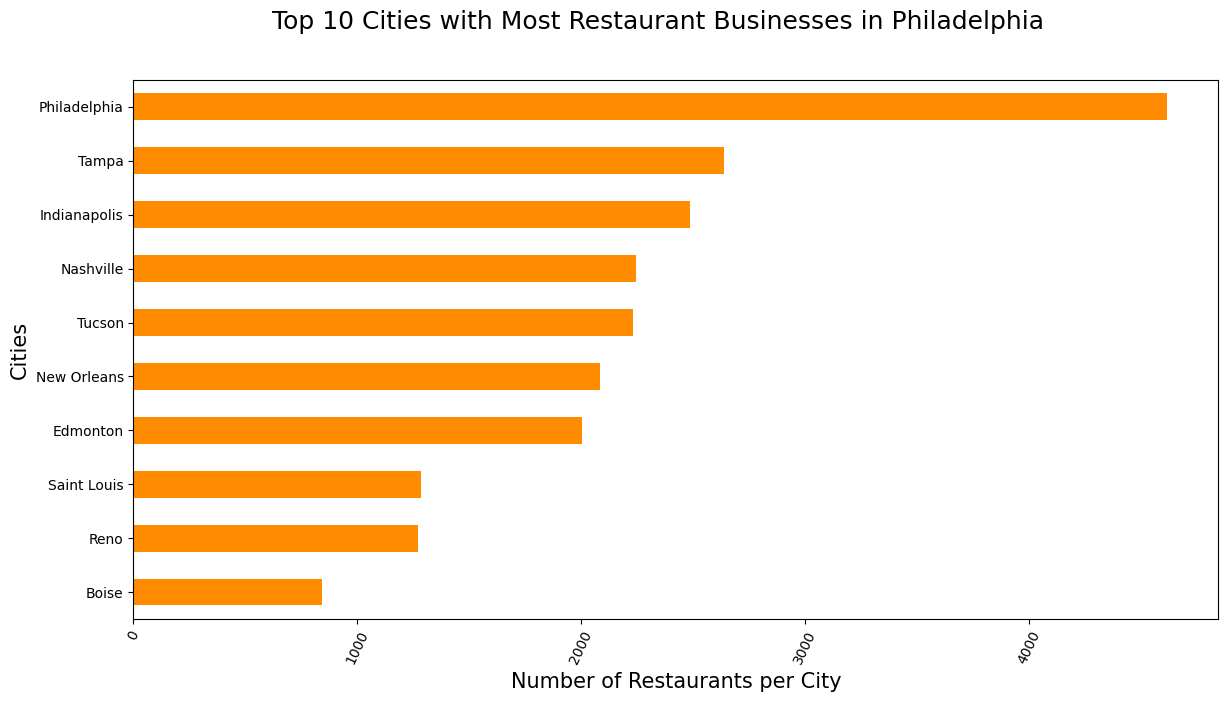

In [18]:
# Distribution of Cities with Most Restaurant Businesses in Ontario

#business_on = business_food[business_food['state']=='ON']
top_cities = business_food['city'].value_counts().head(10)
top_cities.sort_values(inplace=True)

fig, ax = plt.subplots(figsize=(14, 7), )
fig.suptitle('Top 10 Cities with Most Restaurant Businesses in Philadelphia', fontsize=18)

top_cities.plot(kind = 'barh', color= 'darkorange')

plt.ylabel('Cities', fontsize=15)
plt.xlabel('Number of Restaurants per City', fontsize=15)
plt.xticks(rotation=65)

In [19]:
# Create a map centered on Philadelphia (use the average latitude/longitude)
map_center = [business_final['latitude'].mean(), business_final['longitude'].mean()]
philadelphia_map = folium.Map(location=map_center, zoom_start=12)

philadelphia_locations = business_final[['postal_code', 'latitude', 'longitude']]

# Plot each business with its postal code as a marker
for _, row in philadelphia_locations.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Postal Code: {row['postal_code']}").add_to(philadelphia_map)

# Save map to an HTML file
philadelphia_map.save('philadelphia_postal_codes_map.html')

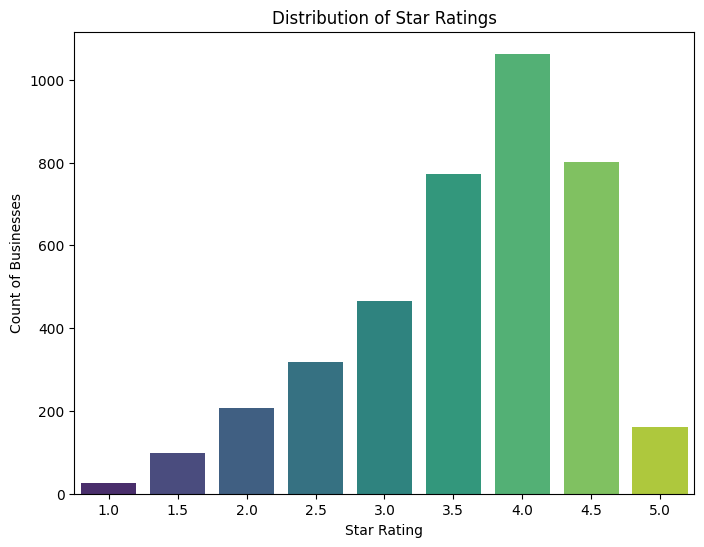

In [20]:
# Differntiate the stara ratinhs 
plt.figure(figsize=(8, 6))

# Plotting the distribution of ratings (Bar Plot)
sns.countplot(data=business_final, x='stars', palette='viridis')

plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count of Businesses')
plt.show()

In [21]:
len(business_final)

3912

In [22]:
# Initialize S3 client
s3 = boto3.client('s3')

# Bucket and file paths
s3_bucket_name = 'amazon-sagemaker-058264306111-us-east-1-e23504aef6c5'
base_path = 'dzd_5l5kah6gnsnq3r/cw3b39k5tpzag7/dev/'
json_file = 'yelp_academic_dataset_review.json'

# Construct full S3 key
json_s3_path = base_path + json_file

# Read JSON file from S3
obj = s3.get_object(Bucket=s3_bucket_name, Key=json_s3_path)

# Decode and process JSON Lines format
json_content = obj['Body'].read().decode('utf-8')
records = [json.loads(line) for line in json_content.splitlines()]

# Convert to DataFrame
review_df = pd.DataFrame(records)

In [23]:
# reveiw datafram

review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [24]:
# Splitting Date Column into Year, Month and Time Columns

def create_yr(x): 
    return x.split('-')[0] 

def create_mth(x): 
    return x.split('-')[1] 

def create_time(x):
    return x.split(' ')[1]

review_df['year'] = review_df.date.apply(create_yr)
review_df['month'] = review_df.date.apply(create_mth)
review_df['time'] = review_df.date.apply(create_time)

# Overview of new df with 3 new columns

review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018,07,22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012,01,15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,02,20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,01,00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2017,01,20:54:15


In [25]:
review_df.shape

(6990280, 12)

In [26]:
# Filter the review by business ID which waas choosen in business_food

business_food['key'] = business_food.iloc[:,0]

# Keeping only the reviews for the restaurants in our selected dataset

restaurant_reviews = review_df[review_df['business_id'].isin(business_food['key'])]
restaurant_reviews = restaurant_reviews.reset_index().iloc[:,2:]
print(restaurant_reviews.shape)
restaurant_reviews.head()

(4213398, 11)


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018,07,22:09:11
1,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,02,20:30:30
2,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,01,00:01:03
3,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06,2016,07,07:31:06
4,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4.0,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45,2015,08,14:31:45


In [27]:
# Number of Unique Users in this Reviews Dataset

n_users = len(restaurant_reviews.user_id.unique())
n_users

1356217

In [28]:
# Calculate the average star rating for each restaurant
avg_ratings = restaurant_reviews.groupby('business_id')['stars'].mean()

# Display the top 10 restaurants with the highest average ratings
top_avg_ratings = avg_ratings.sort_values(ascending=False).head(10)
print(top_avg_ratings)


business_id
jHJCsoQ53CixPE0q-3ATFg    5.0
4t8ClQEmeDyyEfx-KupDwQ    5.0
eCH2Q-4K_8e9wZmdGZr6jA    5.0
aNqUQTh7dzjB2R-3rZ3z_Q    5.0
zuObDJ16rxyt5ciCbhKnlA    5.0
zlCQQbeksTCfSUvSSuv8bA    5.0
4r6xzZL0P-Hn_EDN_OWqCA    5.0
8r0w0UD8zGCb5BMyxapiwg    5.0
zlnnaUF7ZNH6DuZVje4j7g    5.0
-6jvfSJGprbfBD2QrS9zQw    5.0
Name: stars, dtype: float64


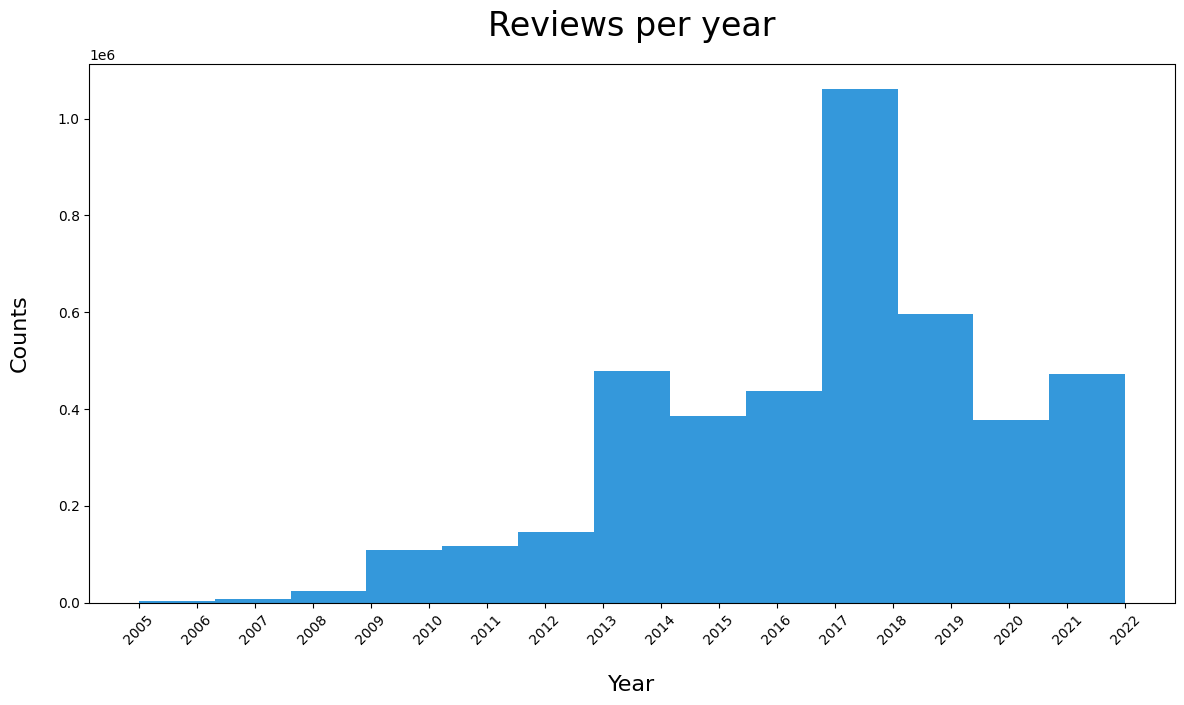

In [29]:
# Filter reviews by year on year
restaurant_sorted = restaurant_reviews.sort_values(by='year', ascending=True)
restaurant_sorted.head()

# Histogram plot of Restaurant Reviews per Year

def make_histogram(dataset, attribute, bins=13, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2) 
    plt.xticks(rotation=45) 
make_histogram(restaurant_sorted, 'year', title='Reviews per year', xlab='Year', ylab='Counts')


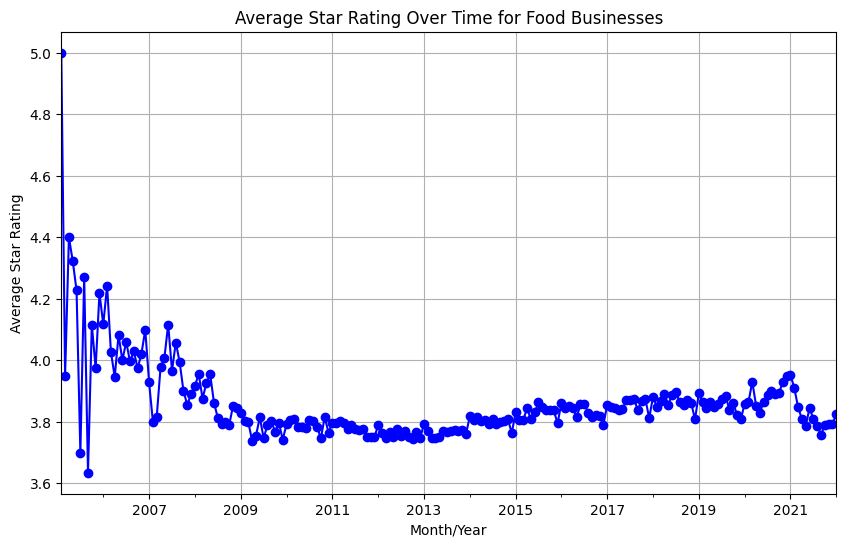

In [30]:
# Convert 'date' column to datetime if necessary
restaurant_reviews['date'] = pd.to_datetime(restaurant_reviews['date'])

# Calculate the average rating per month/year
restaurant_reviews['month_year'] = restaurant_reviews['date'].dt.to_period('M')
avg_rating_over_time = restaurant_reviews.groupby('month_year')['stars'].mean()

# Plot the average rating over time
plt.figure(figsize=(10, 6))
avg_rating_over_time.plot(kind='line', marker='o', color='b')
plt.title('Average Star Rating Over Time for Food Businesses')
plt.xlabel('Month/Year')
plt.ylabel('Average Star Rating')
plt.grid(True)
plt.show()


In [31]:
# check for null vlaue

restaurant_reviews.isnull().sum()

user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
month          0
time           0
month_year     0
dtype: int64

In [32]:
# Initialize S3 client
s3 = boto3.client('s3')

# Bucket and file paths
s3_bucket_name = 'amazon-sagemaker-058264306111-us-east-1-e23504aef6c5'
base_path = 'dzd_5l5kah6gnsnq3r/cw3b39k5tpzag7/dev/'
json_file = 'yelp_academic_dataset_user.json'

# Construct full S3 key
json_s3_path = base_path + json_file

# Read JSON file from S3
obj = s3.get_object(Bucket=s3_bucket_name, Key=json_s3_path)

# Decode and process JSON Lines format
json_content = obj['Body'].read().decode('utf-8')
records = [json.loads(line) for line in json_content.splitlines()]

# Convert to DataFrame
user_df = pd.DataFrame(records)

In [33]:
# check ghe dataframe

user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [34]:
# Filtering for Active Yelp Users who have completed at least 5 reviews

user_df = user_df[user_df['review_count'] >= 5]

# Overview of our JSON Dataframe

print(user_df.shape)
user_df.sample(10)

(1087094, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1308229,liXwuKeN0J0xdBARYAx0WQ,Krista,6,2014-03-17 15:31:19,1,0,1,,None,0,...,0,0,0,0,0,0,0,0,0,0
559134,oEtcNa0OFBwuBdIDUbUQZQ,Michael,33,2014-06-23 22:28:30,21,4,11,,None,0,...,0,0,0,0,1,2,0,0,0,0
1100669,00JYpYUnz8tXTiZPNR6giA,Lori,28,2011-06-12 00:36:49,21,10,4,,0SV5ieadghi5H4x0CMJuGw,0,...,0,0,0,0,0,0,0,0,0,0
802733,heys0iwRjs5ZC7rTNn-iTQ,Nafeesah,485,2009-01-27 20:34:36,1182,375,195,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2...","ccaaKigzlvUEC5Q6oXZECw, fcN7ko5x6RZ8L9RhUxeUbw...",19,...,8,0,1,0,25,59,9,9,9,0
1595323,Yl89yGk6MQQjLkaUDaqU5Q,Toni,6,2010-03-23 22:44:58,8,3,1,,"j9vLZfOZegJrfcb2LjQclg, MVU-7E3sBaiJbUtWeD9eTQ...",0,...,0,0,0,0,0,0,0,0,1,0
1704027,DEd3hndlcnsvEBl9uY1BZQ,An,21,2014-02-18 15:04:15,30,3,3,,None,0,...,0,0,0,0,0,0,0,0,0,0
51826,CPKL58ettBqetWah4ynAOg,Rhonda,6,2014-03-20 20:46:17,3,0,0,,"4LQH-DLccIIjtQGlu-tigw, WvVmctmbXUiqpPTgoHwIHA...",1,...,0,0,0,0,0,0,0,0,0,0
180979,6SUFizDcELdIZ17qSMNeWw,Barry,37,2017-04-08 05:48:44,18,5,3,,None,0,...,0,0,0,0,0,0,0,0,0,0
933066,eCXAglJHFL0prv3VtSiz8w,Lance,7,2019-10-07 01:41:12,1,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
142112,Obyx3NO5uCCy4tSHg7nQTQ,Kristen,9,2014-08-05 18:21:29,3,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Number of unique active users in our user_df dataset

n_users = len(user_df.user_id.unique())
n_users 

1087094

In [36]:
# Checking for Null Values

user_df.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [37]:
# Filtering for Yelp Customer Reviews for our final Restaurant Business Dataset

business_final['key'] = business_final.iloc[:,0]
review_final = restaurant_reviews[restaurant_reviews['business_id'].isin(business_final['key'])]
review_final = review_final.reset_index().iloc[:,1:]
print(review_final.shape)
review_final.head()

(547593, 12)


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time,month_year
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,01,00:01:03,2015-01
1,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,2013,06,11:21:25,2013-06
2,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,2014,11,15:30:27,2014-11
3,vrKkXsozqqecF3CW4cGaVQ,rjuWz_AD3WfXJc03AhIO_w,5.0,2,2,2,I thoroughly enjoyed the show. Chill way to s...,2012-12-04 16:46:20,2012,12,16:46:20,2012-12
4,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018,08,21:39:38,2018-08


We are now left with 5,00,277 rows of Yelp User Reviews Data for our 11070 Restaurant Businesses in Philidelphia.

In [38]:
# Filtering for our final Yelp Users Dataset

review_final['key'] = review_final.iloc[:,1]
users_final = user_df[user_df['user_id'].isin(review_final['key'])]
users_final = users_final.reset_index().iloc[:,1:]
print(users_final.shape)

(49, 22)


In [39]:
users_final.tail()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
44,StJngGaxDOJDjNmsCcKuAQ,Taylor,231,2009-02-12 02:13:19,442,72,196,"2013,2014,2015,2016","vwAleUf4xj1RT51eAkABWQ, 3-Wv6LeZzAtdtmaRlAyqCA...",20,...,4,2,2,0,11,10,27,27,10,0
45,mQtH3YlGXdmxvsZ9y77YAA,Ruben,13,2012-07-30 16:47:29,24,3,2,,"6kW5mKICrvgHV9f49jEi-A, 7oKYZ6wwTWUKI5p-Sjmymg...",0,...,0,0,0,0,0,0,0,0,0,0
46,Gm1DYE8Ko0IaYnpfvKhCXQ,D,11,2015-02-01 19:02:31,6,1,0,,"a8Bg8gwLa3rgtY_Qpo1IJg, 65zX2cbdly-J-u-1uSZLXg...",0,...,0,0,0,0,0,0,0,0,0,0
47,DTbKzkWQGWJsHvhE6OcUFw,Christine,6,2009-02-10 02:06:31,1,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
48,u2THoMNjQJU8eIv8AAQKTw,P,7,2016-11-17 02:49:56,0,1,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


We are now left with 40 unique active Yelp User Data for our 5,00,277  rows of Yelp User Reviews Data for our 11,070 Restaurent

In [40]:
# Initialize S3 client
s3 = boto3.client('s3')

# Bucket and file paths
s3_bucket_name = 'amazon-sagemaker-058264306111-us-east-1-e23504aef6c5'
base_path = 'dzd_5l5kah6gnsnq3r/cw3b39k5tpzag7/dev/'
json_file = 'yelp_academic_dataset_checkin.json'

# Construct full S3 key
json_s3_path = base_path + json_file

# Read JSON file from S3
obj = s3.get_object(Bucket=s3_bucket_name, Key=json_s3_path)

# Decode and process JSON Lines format
json_content = obj['Body'].read().decode('utf-8')
records = [json.loads(line) for line in json_content.splitlines()]

# Convert to DataFrame
checkin_df = pd.DataFrame(records)

In [41]:
# checj the dataset

print(checkin_df.head())

              business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
2  --30_8IhuyMHbSOcNWd6DQ           2013-06-14 23:29:17, 2014-08-13 23:20:22
3  --7PUidqRWpRSpXebiyxTg  2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...
4  --7jw19RH9JKXgFohspgQw  2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...


In [42]:
# Initialize S3 client
s3 = boto3.client('s3')

# Bucket and file paths
s3_bucket_name = 'amazon-sagemaker-058264306111-us-east-1-e23504aef6c5'
base_path = 'dzd_5l5kah6gnsnq3r/cw3b39k5tpzag7/dev/'
json_file = 'yelp_academic_dataset_tip.json'

# Construct full S3 key
json_s3_path = base_path + json_file

# Read JSON file from S3
obj = s3.get_object(Bucket=s3_bucket_name, Key=json_s3_path)

# Decode and process JSON Lines format
json_content = obj['Body'].read().decode('utf-8')
records = [json.loads(line) for line in json_content.splitlines()]

# Convert to DataFrame
tip_df = pd.DataFrame(records)

Saving Dataframes into CSV Files

Having finalized my filtered datasets, I will be saving them into CSVs and will be using these files for subsequent Jupyter Notebooks in this repository.

In [46]:
# Save business_final into csv file

# import os

# # Directory path
# output_dir = "/Data/Part1"

# # Create directory if it doesn't exist
# os.makedirs(output_dir, exist_ok=True)

# # Now save the file
# business_final.to_csv(f"{output_dir}/business_final.csv", index=False)

business_final.to_csv("business_final.csv")

In [48]:
# Save reviews_final into csv file

review_final.to_csv("review_final.csv")

In [50]:
# Save users_final into csv file

users_final.to_csv("users_final.csv")

### **Comment on Data Quality**  

#### **1. Why the selected data (e.g., reviews/customers/business/regions) are suitable for answering your business questions?**  
The selected **Yelp dataset**, which includes **business information, reviews, customers, and regions**, is suitable for answering business questions related to **customer satisfaction, business popularity, and regional trends**. Specifically:  
- **Business Data** provides details like **name, category, location, and star ratings**, which help analyze the most successful restaurants and food businesses.  
- **Review Data** captures **customer sentiment, detailed feedback, and ratings**, allowing us to analyze what drives high or low customer satisfaction.  
- **User Data** (customers) includes **review counts and preferences**, which can help identify frequent reviewers and customer engagement levels.  
- **Regional Data** (city and postal code) allows insights into **geographical patterns**, helping businesses understand which areas perform best or need improvement.  

By merging these datasets, we can gain insights into **customer preferences, business performance, and regional market trends**.  

---

#### **2. Whether the sample size is appropriate, and why?**  
- **The Yelp dataset is relatively large**, covering **thousands of businesses, millions of reviews, and diverse customers** across different regions.  
- **Larger sample sizes lead to more reliable insights**, as they reduce variability and ensure that trends are not based on a small, potentially biased subset.  
- **However, some limitations exist**: If we focus on a **specific city (e.g., Philadelphia)** or **category (e.g., Restaurants)**, the sample size may shrink, potentially leading to **less representative results**.  
- **Balancing between specificity and sample size** is essential—too broad, and insights may be diluted; too narrow, and results may not generalize well.  

---

#### **3. Whether the selected data could be biased in certain dimensions in your analysis?**  
Yes, the selected data could be **biased** in multiple ways:  
- **User Bias:** Reviews are typically **voluntary**, meaning they are more likely to be from people who had **very positive or very negative experiences**, rather than a random sample of all customers.  
- **Geographical Bias:** The dataset may have **more data from urban areas** where Yelp is widely used, while rural or less populated regions may be underrepresented.  
- **Business Selection Bias:** Only businesses that are **listed on Yelp** are included, meaning that restaurants or businesses that don’t use Yelp or have a weak online presence may be missing from the dataset.  
- **Review Manipulation:** Some businesses may **buy fake reviews or delete negative ones**, leading to an artificially inflated rating.  
- **Time-based Bias:** If businesses improved or declined over time, looking at **all-time average ratings** may not reflect their current performance.  

Addressing these biases requires careful **data filtering and analysis techniques** to ensure results are as objective as possible.  

---

#### **4. The potential challenges to process the data?**  
- **Data Cleaning**: The dataset may have **missing values, duplicates, or inconsistent formats** (e.g., missing postal codes or categories stored as lists instead of text).  
- **Text Processing**: Review text data requires **sentiment analysis, tokenization, and NLP techniques** to extract insights.  
- **Handling Large Data**: The dataset is massive, making **data merging, filtering, and visualization computationally expensive**. Optimized **database queries and parallel processing** may be required.  
- **Unstructured Data Issues**: Categories are stored as **comma-separated values**, requiring additional **parsing and standardization** to group businesses correctly.  
- **Geospatial Analysis**: Mapping and analyzing **business performance by region** requires external geospatial tools like `geopandas` or `folium`.  
- **Bias Mitigation**: Addressing bias in **review data and customer demographics** requires careful **sampling and weighting techniques**.  

---

### **Conclusion**  
Overall, the Yelp dataset is **a valuable source** of insights into customer behavior and business performance. However, **bias, sample size considerations, and data processing challenges** must be addressed carefully to ensure accurate, meaningful analysis. 🚀  

Would you like recommendations on how to **clean and preprocess** the data efficiently?

In [117]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load restaurant reviews data
reviews = review_final['text'].astype(str)

# Initialize text preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization & stopword removal
    return words

# Apply text processing to reviews
processed_reviews = reviews.apply(preprocess_text)


[nltk_data] Downloading package stopwords to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [118]:
# Flatten the list of words across all reviews
all_words = [word for review in processed_reviews for word in review]

# Count word frequencies
word_freq = Counter(all_words)

# Display the top 20 most common words
print(word_freq.most_common(20))

[('food', 350464), ('place', 298754), ('good', 297935), ('great', 228550), ('time', 190123), ('like', 178332), ('one', 166442), ('get', 159731), ('service', 157632), ('go', 143884), ('really', 141270), ('back', 135243), ('would', 134440), ('also', 130138), ('restaurant', 123020), ('order', 116926), ('delicious', 115976), ('ordered', 114555), ('got', 111015), ('best', 102299)]


In [119]:
from nltk.util import ngrams

# Extract bigrams and trigrams
bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

# Count bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Display top bigrams and trigrams
print("Top 10 Bigrams:", bigram_freq.most_common(10))
print("Top 10 Trigrams:", trigram_freq.most_common(10))


Top 10 Bigrams: [(('go', 'back'), 23338), (('happy', 'hour'), 21617), (('come', 'back'), 21569), (('first', 'time'), 20918), (('really', 'good'), 19657), (('pretty', 'good'), 16978), (('food', 'good'), 16840), (('highly', 'recommend'), 16526), (('next', 'time'), 15210), (('5', 'star'), 14671)]
Top 10 Trigrams: [(('wait', 'go', 'back'), 4275), (('definitely', 'come', 'back'), 3808), (('reading', 'terminal', 'market'), 3155), (('definitely', 'go', 'back'), 2918), (('dan', 'dan', 'noodle'), 2746), (('would', 'go', 'back'), 2735), (('would', 'definitely', 'recommend'), 2707), (('would', 'come', 'back'), 2452), (('would', 'highly', 'recommend'), 2387), (('mac', 'n', 'cheese'), 2311)]


In [125]:
# # Function to get sentiment polarity (-1 to 1)
# def get_sentiment(text):
#     return TextBlob(text).sentiment.polarity

# # Apply sentiment analysis to review texts
# review_final['sentiment'] =review_final['text'].apply(get_sentiment)

# # Display the average sentiment for each restaurant
# avg_sentiment =reviews_final.groupby('business_id')['sentiment'].mean()

# # Display top 10 restaurants with the highest average sentiment
# top_sentiment = avg_sentiment.sort_values(ascending=False).head(10)
# print(top_sentiment)

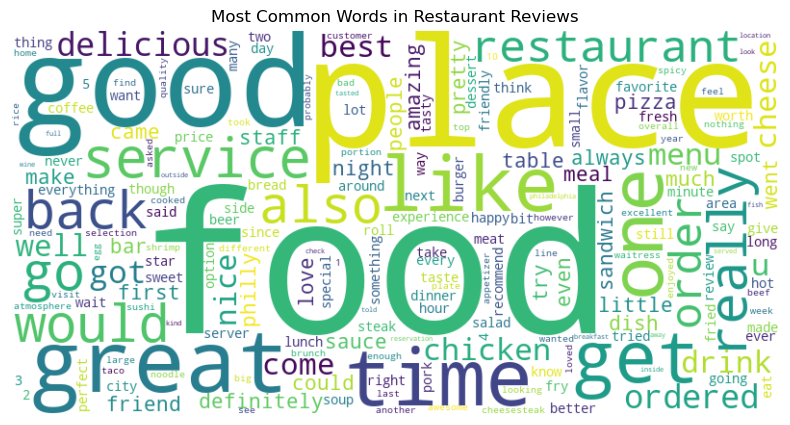

In [127]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Restaurant Reviews')
plt.show()

Our project will combine deep learning (CNNs) with traditional ML models (SVM, Random Forest, KNN) for sentiment classification. Feature engineering, sentiment analysis, and model evaluation will ensure that the system provides accurate, actionable insights for businesses.



In [128]:
!jupyter nbconvert --to html ProjectEDANeural_Ninja_Turtle.ipynb

[NbConvertApp] Converting notebook ProjectEDANeural_Ninja_Turtle.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 999043 bytes to ProjectEDANeural_Ninja_Turtle.html
